In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

#### pandas_datareader:

The Pandas datareader is a sub package that allows one to create a dataframe from various internet datasources, currently including: Yahoo! Finance. Google Finance.
Here, I have scrapped the data from https://finance.yahoo.com

#### Scrapping the data -

In [2]:
start = '2010-01-01'
end = '2022-07-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-25,155.039993,152.279999,154.009995,152.949997,53623900.0,152.737839
2022-07-26,153.089996,150.800003,152.259995,151.600006,55138700.0,151.389725
2022-07-27,157.330002,152.160004,152.580002,156.789993,78620700.0,156.572510
2022-07-28,157.639999,154.410004,156.979996,157.350006,81378700.0,157.131744
2022-07-29,163.630005,159.500000,161.240005,162.509995,101689200.0,162.284576


In [4]:
df = df.reset_index()
df.head()

#The reset_index() method allows you reset the index back to the default 0, 1, 2 etc indexes. 

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.425999
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433318
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


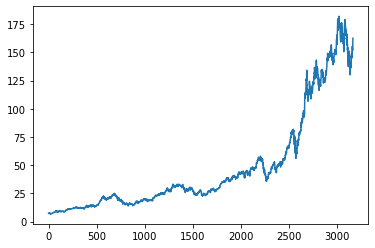

In [6]:
plt.plot(df.Close)

In [7]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3161,155.039993,152.279999,154.009995,152.949997,53623900.0
3162,153.089996,150.800003,152.259995,151.600006,55138700.0
3163,157.330002,152.160004,152.580002,156.789993,78620700.0
3164,157.639999,154.410004,156.979996,157.350006,81378700.0


#### Calculating the Moving Average (ma) -

A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates a downtrend.

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

#Moving Average for 100 days

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3161    153.9333
3162    153.7837
3163    153.6893
3164    153.6311
3165    153.6632
Name: Close, Length: 3166, dtype: float64

#### Now, plotting the Moving Averages on graph -

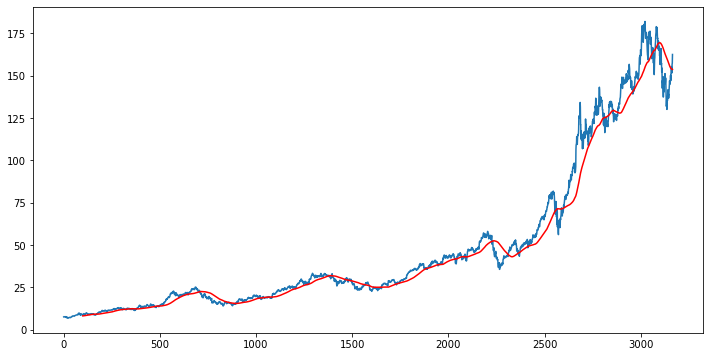

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

#Moving Average for 200 days

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3161    158.65000
3162    158.69155
3163    158.76100
3164    158.83370
3165    158.93870
Name: Close, Length: 3166, dtype: float64

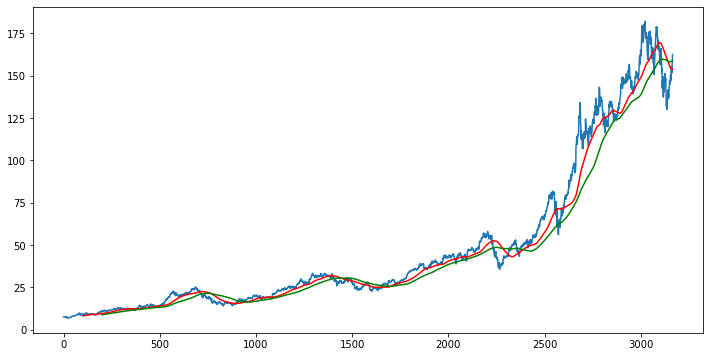

In [13]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [14]:
df.shape

(3166, 5)

#### Now, splitting data into training and testing.

In [17]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2216, 1)
(950, 1)


In [18]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [19]:
data_testing.head()

,Close
2216,54.827499
2217,55.162498
2218,55.682499
2219,53.772499
2220,54.950001


#### Now, scaling down the data -

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.95152321],
       [0.94683196],
       [0.92156738]])

In [22]:
data_training_array.shape

(2216, 1)

#### Converting the x_train and y_train into numpy arrays

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

#### Moving towards making the Machine Learning Model -

In [26]:
!pip install keras

In [28]:
!pip install tensorflow

  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached importlib_metadata-4.12.0-py3-none-any.whl (21 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=f3732628f311947af223f64bef70f1eb5f71710ab7f77730f77b05d7e8e00c44
  Stored in directory: c:\users\fairy\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.1
    Uninstalling protobuf-4.21.1:
      Successfully uninstalled protobuf-4.21.1


#### Now, defining a simple LSTM Model -

LSTM Model here is 4 layer model, and in the end we have the Dense layer to connect all the 4 layers.

In [29]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))

model.add(Dense(units = 1))
#1 in the end because we are only working with the 'Close' column

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

#### Now, compiling the model -

In [37]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

#Using the concept of Time Series Analysis

Epoch 1/50
67/67 [==============================] - 23s 261ms/step - loss: 0.0016
Epoch 2/50
67/67 [==============================] - 11s 162ms/step - loss: 0.0019
Epoch 3/50
67/67 [==============================] - 10s 151ms/step - loss: 0.0019
Epoch 4/50
67/67 [==============================] - 11s 157ms/step - loss: 0.0018
Epoch 5/50
67/67 [==============================] - 11s 159ms/step - loss: 0.0017
Epoch 6/50
67/67 [==============================] - 11s 160ms/step - loss: 0.0017
Epoch 7/50
67/67 [==============================] - 11s 165ms/step - loss: 0.0017
Epoch 8/50
67/67 [==============================] - 11s 158ms/step - loss: 20501530624.0000
Epoch 9/50
67/67 [==============================] - 11s 162ms/step - loss: 0.0027
Epoch 10/50
67/67 [==============================] - 11s 161ms/step - loss: 0.0023
Epoch 11/50
67/67 [==============================] - 11s 160ms/step - loss: 0.0021
Epoch 12/50
67/67 [==============================] - 14s 212ms/step - loss: 0.0021
Epo

#### Saving our trained model -

In [39]:
model.save('keras_model.h5')

In [40]:
data_testing.head()

,Close
2216,54.827499
2217,55.162498
2218,55.682499
2219,53.772499
2220,54.950001


#### Now, for predicting the values of testing data above, we need the values of the previous 100 days which are starting from 2216 to 99 days. So, we need to append the data training values from data_training.tail(100) to predict the required values starting from 2216 to 99 days.

In [41]:
data_testing.tail()

,Close
3161,152.949997
3162,151.600006
3163,156.789993
3164,157.350006
3165,162.509995


In [42]:
past_100_days = data_training.tail(100)

In [43]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [44]:
final_df.head()

#this gives us the testing data

,Close
0,46.875000
1,46.717499
2,47.560001
3,47.957500
4,48.327499


#### Now, scaling down the above testing data

In [45]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.07734062],
       [0.07626525],
       [0.08201759],
       ...,
       [0.82780574],
       [0.83162933],
       [0.86686011]])

In [46]:
input_data.shape

(1050, 1)

In [47]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

#### Again, converting the above into numpy arrays -

In [48]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(950, 100, 1)
(950,)


#### Now, making predictions -

In [49]:
y_predicted = model.predict(x_test)

30/30 [==============================] - 6s 150ms/step


In [50]:
y_predicted.shape

(950, 1)

In [51]:
y_test

array([0.13163779, 0.13392506, 0.13747546, 0.12443458, 0.13247419,
       0.12649996, 0.11956987, 0.1213792 , 0.13086968, 0.13660494,
       0.1114449 , 0.10139113, 0.10511224, 0.115661  , 0.11316891,
       0.10630708, 0.08872578, 0.08541435, 0.07614578, 0.08401469,
       0.08763335, 0.07454126, 0.05938379, 0.05904241, 0.05137833,
       0.05535546, 0.05470684, 0.06614321, 0.06377059, 0.06211488,
       0.07276608, 0.0588888 , 0.05552616, 0.04489204, 0.04678673,
       0.04513101, 0.04593327, 0.04909106, 0.03975419, 0.03712555,
       0.0407613 , 0.03191943, 0.02498933, 0.0145771 , 0.00792012,
       0.02556968, 0.02382861, 0.02396517, 0.02654264, 0.02684987,
       0.        , 0.010361  , 0.00979771, 0.01461125, 0.01898096,
       0.01981736, 0.01723989, 0.01333105, 0.01857132, 0.02176325,
       0.02333362, 0.02497227, 0.0189639 , 0.02002218, 0.01793974,
       0.02657676, 0.02408467, 0.02131943, 0.03936161, 0.04139285,
       0.04152941, 0.04960314, 0.05460441, 0.05470684, 0.04907

In [52]:
y_predicted

array([[0.14910427],
       [0.14915927],
       [0.14914528],
       [0.14907134],
       [0.14894457],
       [0.14877531],
       [0.1485672 ],
       [0.14831321],
       [0.14800623],
       [0.14765275],
       [0.1472807 ],
       [0.14689073],
       [0.14646675],
       [0.14599352],
       [0.14545572],
       [0.14485383],
       [0.14419295],
       [0.14346573],
       [0.14266005],
       [0.14175929],
       [0.14075729],
       [0.13966182],
       [0.1384804 ],
       [0.13720661],
       [0.1358318 ],
       [0.13434261],
       [0.1327341 ],
       [0.13101009],
       [0.12919648],
       [0.12732698],
       [0.12543507],
       [0.12356488],
       [0.12174071],
       [0.11997364],
       [0.11825705],
       [0.11657929],
       [0.11492707],
       [0.11328918],
       [0.11166154],
       [0.11003646],
       [0.10840467],
       [0.10676347],
       [0.10510693],
       [0.10342368],
       [0.10169576],
       [0.09990153],
       [0.09803696],
       [0.096

In [53]:
scaler.scale_

array([0.00682769])

In [54]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

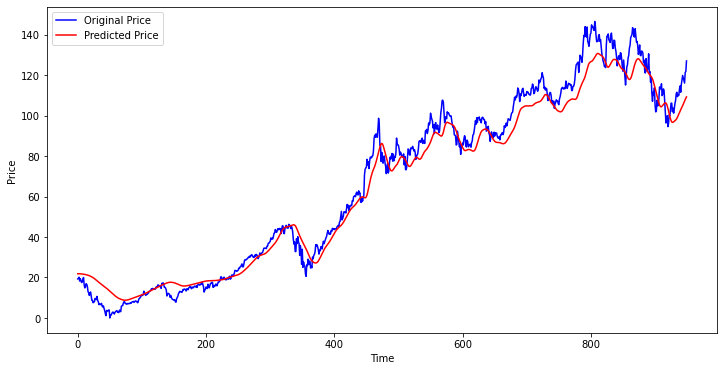

In [55]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()